# Multidimensional scaling

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances

In [109]:
df = pd.read_csv('crenge_markers_CompSem_mds.csv')
df.head(5)

,Topological Relation,sisällä,-llA,päällä,lähellä,vieressä,-(ə̑)štə̑ ~ (ӛ)štӛ,-eš,vӛlnӛ,vujə̑štə̑,...,sisnie,-se ~ sse ~ n,nelnie,nille,nueliem,jarge,luvnie,Unnamed: 49,-ssA,alla
0,IN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SUBST,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,GL,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ON,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HUMAN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [110]:
matrix = df.loc[:, '-llA':'alla']
array = matrix.values
print (array.shape)

(7, 50)


In [111]:
similarities = euclidean_distances(array)
mds = manifold.MDS(n_components=2)
print (mds.fit(similarities).stress_)

33.951666446776706


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [112]:
array_mds = mds.fit_transform(array)
print (array_mds)

[[ 2.29613235  0.47555503]
 [ 1.0487291  -0.18346065]
 [ 2.22710551 -1.86982038]
 [-0.28461689 -3.18721656]
 [ 0.02556631  2.95821882]
 [-2.3641322   2.48042966]
 [-2.94878419 -0.67370592]]


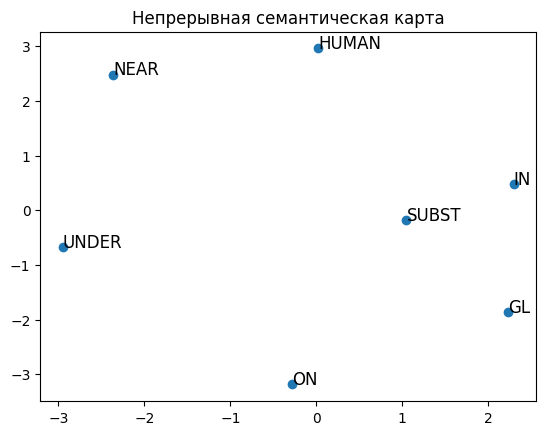

In [113]:
for i, loc in enumerate(df['Topological Relation']):
    plt.annotate(loc, (array_mds[i, 0], array_mds[i, 1]), fontsize=12)

plt.scatter(array_mds[:, 0], array_mds[:, 1])
plt.title("Непрерывная семантическая карта")
plt.show()

# Классические семантические карты
По алгоритму, адаптированному из [Regier et al. 2013]

In [115]:
import networkx as nx
from itertools import combinations

def create_connected_graph(V, constraints):
    G = nx.Graph()
    G.add_nodes_from(V)

    # сортируем рёбра от более значимых к менее значимым
    sorted_edges = sorted(d_meaning.items(), key=lambda item: item[1], reverse=False)

    # добавляем ребра в граф
    for (u, v), importance in sorted_edges:
      if nx.has_path(G, u, v): # если уже есть путь между двумя данными узлами, то проускаем
        pass
      else:
        G.add_edge(u, v) # если нет, добавляем ребро

    return G

def extract_constraints(data):
    """автоматическое извлечение ограничений (отлавливаем синкретизмы)"""
    global d_meaning

    constraints = []

    # Iterate over each row in the DataFrame
    for index, row in data.iterrows():
        means = row['Marker']  # Вторая колонка - средства
        sync = row[2:].index[row[2:] == 1.0].tolist()  # Индексы колонок с локализациями, где значение 1.0

        # Проверяем, есть ли более одной локализации
        if len(sync) >= 2:
            for i in range(len(sync)):
                for j in range(i + 1, len(sync)):
                    constraints.append([sync[i], sync[j]])

                    d_meaning[(sync[i], sync[j])]=len(sync)

    return constraints

d_meaning = {} # словарь значимостей

data = pd.read_csv('crenge_markers_CompSem.csv')
V = ['IN', 'ON', 'GL', 'HUMAN', 'UNDER', 'SUBST', 'NEAR']
constraints = extract_constraints(data)  # автоматически извлекаем ограничения

graph = create_connected_graph(V, constraints) # строим граф

# выводим все проведенные алгоритмом ребра
if graph and graph.number_of_edges() > 0:
    print(graph.edges())
else:
    print("С такими ограничениями граф построить невозможно")

[('IN', 'GL'), ('IN', 'SUBST'), ('ON', 'GL'), ('ON', 'NEAR'), ('GL', 'HUMAN')]


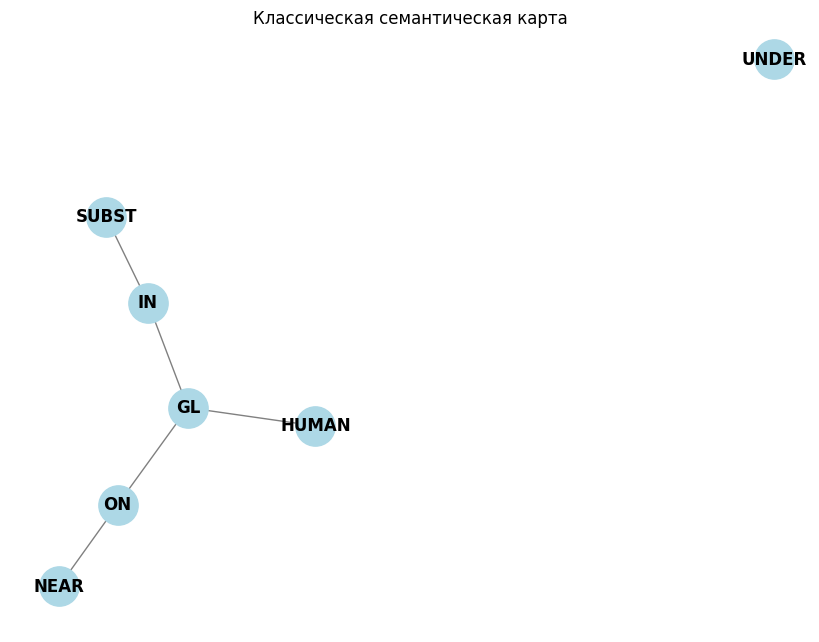

In [116]:
# РИСУЕМ ГРАФ

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray', font_size=12, font_weight='bold')

plt.title("Классическая семантическая карта")

plt.show()